### 1. Test Tensor flow with below python codes in your laptop

<br>

In [171]:

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from keras.layers import Input, Dense
from keras.models import Model

import matplotlib.pyplot as plt

In [172]:
x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
f = x*x*y+y+2

sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)
sess.close()

42


<br>

### 2. Test Tensor flow with linear regressions

In [173]:
import numpy as np
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [174]:
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m,1)), housing.data]
X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1,1), dtype=tf.float32, name="y")

In [175]:
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT,X)), XT), y)
with tf.Session() as sess:
    theta_value = theta.eval()

<br>

### 3. Test Tensor flow with MNIST (handwriting) data set

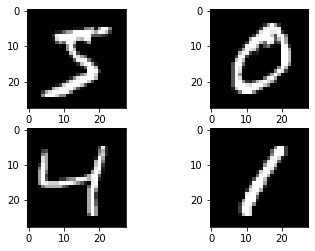

In [176]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load the MNIST dataset:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.show()

In [177]:
# import libraries
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [178]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [179]:
# load data 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

In [180]:
# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

In [181]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [182]:
# define baseline model 
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [183]:
# build the model
model = baseline_model()

# fit the model 
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)

# final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print('Baseline Error: %.2f%%' % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 1s - loss: 0.2822 - acc: 0.9192 - val_loss: 0.1413 - val_acc: 0.9583 - 1s/epoch - 19us/sample
Epoch 2/10


/home/spyros/anaconda3/lib/python3.9/site-packages/keras/engine/training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60000/60000 - 1s - loss: 0.1130 - acc: 0.9670 - val_loss: 0.0996 - val_acc: 0.9700 - 1s/epoch - 19us/sample
Epoch 3/10
60000/60000 - 1s - loss: 0.0720 - acc: 0.9793 - val_loss: 0.0778 - val_acc: 0.9749 - 1s/epoch - 18us/sample
Epoch 4/10
60000/60000 - 1s - loss: 0.0516 - acc: 0.9850 - val_loss: 0.0688 - val_acc: 0.9790 - 1s/epoch - 20us/sample
Epoch 5/10
60000/60000 - 1s - loss: 0.0359 - acc: 0.9899 - val_loss: 0.0645 - val_acc: 0.9790 - 1s/epoch - 18us/sample
Epoch 6/10
60000/60000 - 1s - loss: 0.0258 - acc: 0.9932 - val_loss: 0.0702 - val_acc: 0.9781 - 1s/epoch - 18us/sample
Epoch 7/10
60000/60000 - 1s - loss: 0.0197 - acc: 0.9950 - val_loss: 0.0616 - val_acc: 0.9813 - 1s/epoch - 19us/sample
Epoch 8/10
60000/60000 - 1s - loss: 0.0139 - acc: 0.9971 - val_loss: 0.0583 - val_acc: 0.9825 - 1s/epoch - 19us/sample
Epoch 9/10
60000/60000 - 1s - loss: 0.0111 - acc: 0.9980 - val_loss: 0.0620 - val_acc: 0.9804 - 1s/epoch - 19us/sample
Epoch 10/10
60000/60000 - 1s - loss: 0.0084 - acc: 0.9984 -

<br>

### 4. Derive the gradients for below expressions:

In [184]:
x = np.array([2,3], dtype=float)

# let a1 = 1, a2 = 2, a3 = 3, a4 = 4
A = np.array(
    [[1, 2],
     [3, 4]])


In [185]:
import numdifftools as nd

In [186]:
function = 0.5 * x * A * x

def Grad_f1(x):
    return 0.5*x * A* x

grad = nd.Gradient(Grad_f1)([1])
print(grad)

[[1. 2.]
 [3. 4.]]



#### The gradient of the function produces  A

#### Therefore, gradient of f(x) = Ax